In [1]:
import simpleder
import json
import os
import numpy as np
from pyannote.metrics.diarization import DiarizationErrorRate

In [2]:
import utils

In [3]:
#Dataset name
dataset = 'aishell-4'

In [4]:
#Prediction path
result_path = './test/aishell-4-nooverlap//'

In [5]:
#Operating Mode
_Mode = 'EVAL' # default: EVAL
conv_res = utils.convert_ss

In [6]:
#Choose dataset for evaluation
if dataset == 'aishell-4':
    conv_gt = utils.convert_aishell4
    gt_path = './aishell-4/'
else:
    raise ValueError('Cannot find Dataset!')

In [7]:
#Check the results path
if not os.path.exists(result_path):
    raise ValueError('Cannot find result path!')
    
#Check the number of files
result_list = os.listdir(result_path)
gt_list = os.listdir(gt_path + 'gts/')
if len(result_list) < len(gt_list):
    raise ValueError('Incomplete result files!')


In [8]:
diarizationErrorRate = DiarizationErrorRate()

In [10]:
#Evaluation
DER_list = []
for _gt in gt_list:
    wav_name = _gt.split('.stm')[0]
    
    #Read gt file:
    if dataset == 'aishell-4':
        file_object = open(gt_path + 'gts/' + _gt)  
        gt_text = file_object.read()  
        file_object.close()
    else:
        raise ValueError('Cannot find Dataset!')
    gt = conv_gt(gt_text)
    
    #TEST mode: for developers
    if _Mode == 'TEST':
        _type = '.stm'
        res_path = result_path + wav_name + _type
        
        #Check result file
        if not os.path.exists(res_path):
            raise ValueError('Cannot find result for ' + wav_name)
        
        #Read result file
        file_object = open(res_path)  
        all_the_text = file_object.read()  
        file_object.close()
        
        #Convert Stadard result
        res = conv_gt(all_the_text)
    
    #EVAL mode: for experiments:
    elif _Mode == 'EVAL':
        _type = '.json'
        res_path = result_path + wav_name + _type
        
        #Check result file
        if not os.path.exists(res_path):
            raise ValueError('Cannot find result for ' + wav_name)
            
        #Read result file
        with open(res_path, 'r', encoding = 'utf8') as fp:   #读取第j段的局部说话人日志
            diar = json.load(fp)
        
        #Convert Stadard result
        res = conv_res(diar)
        
        #Count speaker id
        spk_list = utils.countspk_aishell4(gt_text)
        spk_num = len(spk_list)
            
    else:
        raise ValueError('MODE ERROR! Only \'TEST\' or \'EVAL\' mode can be used!')
    
    #cal DER
    try:
        _DER = diarizationErrorRate(gt, res)
    except:
        raise ValueError('DER calculate error for ' + wav_name + '!')
    
    tem_gt = gt
    tem_res = res
    res = []
    gt = []
    
    #collect
    DER_list.append(_DER)
    
#Calculate average DER
DER_list = np.array(DER_list)
DER = np.sum(DER_list) / len(DER_list)

/root/miniconda3/lib/python3.8/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


In [18]:
DER_list

array([0.4009487 , 0.30297068, 0.18191951, 0.29169074, 0.08623867,
       0.16016233, 0.13237868, 0.09968805, 0.13427525, 0.1349827 ,
       0.37220904, 0.34052631, 0.14609832, 0.21982692, 0.13038989,
       0.29832105, 0.06311936, 0.05779059, 0.08160394, 0.09114976])

In [19]:
DER

0.18631452546490668

In [24]:
_gt = gt_list[0]

wav_name = _gt.split('.stm')[0]

#Read gt file:
if dataset == 'aishell-4':
    file_object = open(gt_path + 'gts/' + _gt)  
    gt_text = file_object.read()  
    file_object.close()
else:
    raise ValueError('Cannot find Dataset!')
gt = conv_gt(gt_text)

In [21]:
#gt_text

In [24]:
def countspk_aishell4(all_the_text):
    _tem_list = all_the_text.split('\n')
    spk_list = []
    for _tem in _tem_list:
        if _tem != '':
            _cont = _tem.split(' ')
            _spk_id = _cont[2]
            if _spk_id not in spk_list:
                spk_list.append(_spk_id)
    return spk_list

In [25]:
test = countspk_aishell4(gt_text)

In [26]:
test

['001-M', '002-F', '003-F', '004-F', '005-F']

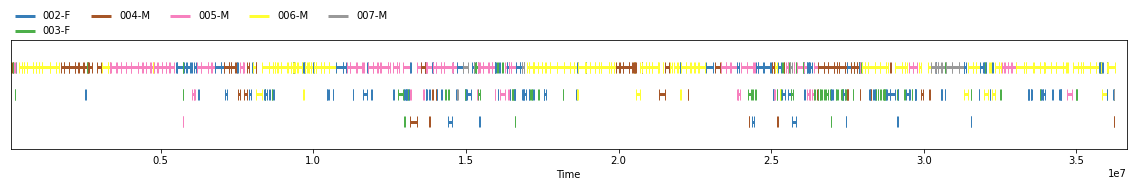

In [25]:
gt

In [26]:
_type = '.json'
res_path = result_path + wav_name + _type

#Check result file
if not os.path.exists(res_path):
    raise ValueError('Cannot find result for ' + wav_name)

#Read result file
with open(res_path, 'r', encoding = 'utf8') as fp:   #读取第j段的局部说话人日志
    diar = json.load(fp)

#Convert Stadard result
res = conv_res(diar)       

In [28]:
diar

[{'start': 2.49,
  'end': 2.86,
  'label': 3,
  'start_sample': 39840,
  'end_sample': 45760},
 {'start': 4.97,
  'end': 6.15,
  'label': 1,
  'start_sample': 79520,
  'end_sample': 98400},
 {'start': 7.82,
  'end': 8.72,
  'label': 5,
  'start_sample': 125120,
  'end_sample': 139520},
 {'start': 8.9,
  'end': 9.63,
  'label': 1,
  'start_sample': 142400,
  'end_sample': 154080},
 {'start': 10.34,
  'end': 10.94,
  'label': 5,
  'start_sample': 165440,
  'end_sample': 175040},
 {'start': 10.94,
  'end': 11.3,
  'label': 0,
  'start_sample': 175040,
  'end_sample': 180800},
 {'start': 13.14,
  'end': 16.44,
  'label': 3,
  'start_sample': 210240,
  'end_sample': 263040},
 {'start': 16.44,
  'end': 17.09,
  'label': 2,
  'start_sample': 263040,
  'end_sample': 273440},
 {'start': 23.38,
  'end': 104.52,
  'label': 3,
  'start_sample': 374080,
  'end_sample': 1672320},
 {'start': 108.09,
  'end': 144.8,
  'label': 1,
  'start_sample': 1729440,
  'end_sample': 2316800},
 {'start': 146.25,
